# JOB MARKET ANALYSIS

## 1. Web Scraping using Selenium

In [30]:
#import necessary packages
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt


#create an instance of browser
driver = webdriver.Chrome()

#creating a dictionary for storing the information after scraping
jobs={"roles":[],
     "companies":[],
     "locations":[],
     "experience":[],
     "skills":[]}


In [31]:
for i in range(2):
    driver.get("https://www.naukri.com/jobs-in-india-{}".format(i))
    time.sleep(3)
    lst=driver.find_elements(By.CSS_SELECTOR, '.jobTuple.bgWhite.br4.mb-8')
    for job in lst:
        try:
            driver.implicitly_wait(3)
            role=job.find_element(By.CSS_SELECTOR,"a.title.fw500.ellipsis").text
            company=job.find_element(By.CSS_SELECTOR, "a.subTitle.ellipsis.fleft").text
            location=job.find_element(By.CSS_SELECTOR, ".fleft.grey-text.br2.placeHolderLi.location").text
            exp=job.find_element(By.CSS_SELECTOR, ".fleft.grey-text.br2.placeHolderLi.experience").text
            skills=job.find_element(By.CSS_SELECTOR, ".tags.has-description").text
            jobs["roles"].append(role)
            jobs["companies"].append(company)
            jobs["locations"].append(location)
            jobs["experience"].append(exp)
#             jobs["skills"].append(skills)
            
            month=[]
            month.append(skills.lower())
            
            for i in month:
                x=(i.split('\n'))
                jobs["skills"].append(x)
                
     

        except NoSuchElementException: 
            pass
        except NameError:
            pass


In [25]:
import pandas as pd
DS_jobs_df=pd.DataFrame(jobs)

In [27]:
DS_jobs_df.to_csv("data.csv")

## 2. Pre-processing

In [28]:
DS_jobs_df=pd.read_csv("data.csv", index_col=0)
DS_jobs_df.head(5)

,roles,companies,locations,experience,skills
0,Consult Radiologist,SRL Diagnostics,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",0-2 Yrs,"['mdaemon', 'ct', 'usg', 'radiology']"
1,Embedded Test Engineer,Cognizant,"Temp. WFH - Noida, Kolkata, Hyderabad/Secunder...",3-7 Yrs,"['iot', 'embedded', 'qc life cycle', 'defect m..."
2,Instructional Designer,Accenture,"Kolkata, Hyderabad/Secunderabad, Pune, Chennai...",3-8 Yrs,"['instructional design', 'captivate', 'e-learn..."
3,JOB Opening For Coupa,HCLTech,"Temp. WFH - Kolkata, Hyderabad/Secunderabad, P...",3-8 Yrs,"['procurement', 'implementing', 'coupa', 'trou..."
4,Physiotherapist,TEAMLEASE SERVICES LIMITED,"Kolkata, Hyderabad/Secunderabad, Pune, Ahmedab...",0-5 Yrs,['physiotherapy']


In [ ]:
#lets check if our data have any null values
DS_jobs_df.isna().sum()

In [ ]:
#lets drop the missing values
DS_jobs_df=DS_jobs_df.dropna()

In [ ]:
#lets check if our data have any dupplicate data
DS_jobs_df[DS_jobs_df.duplicated(subset=["roles","companies","roles","locations","skills"])].shape

In [ ]:
"""print("Before dropping duplicates : ",DS_jobs_df.shape)
DS_jobs_df.drop_duplicates(keep="first",inplace=True)
print("After dropping duplicates : "DS_jobs_df.shape)"""

In [ ]:
#lets lower case all the strings to avoid redundancy
DS_jobs_df=DS_jobs_df.apply(lambda x: x.astype(str).str.lower())

#there are more than one location and skill are attcahed to each job, so lets split locations and jobs.
DS_jobs_df.skills=[skill.split("\n") for skill in DS_jobs_df.skills]
DS_jobs_df.locations=[location.split(",") for location in DS_jobs_df.locations]
DS_jobs_df[15:20]

## 3. Exploratory Data analysis

### 3.1. Location wise Jobs

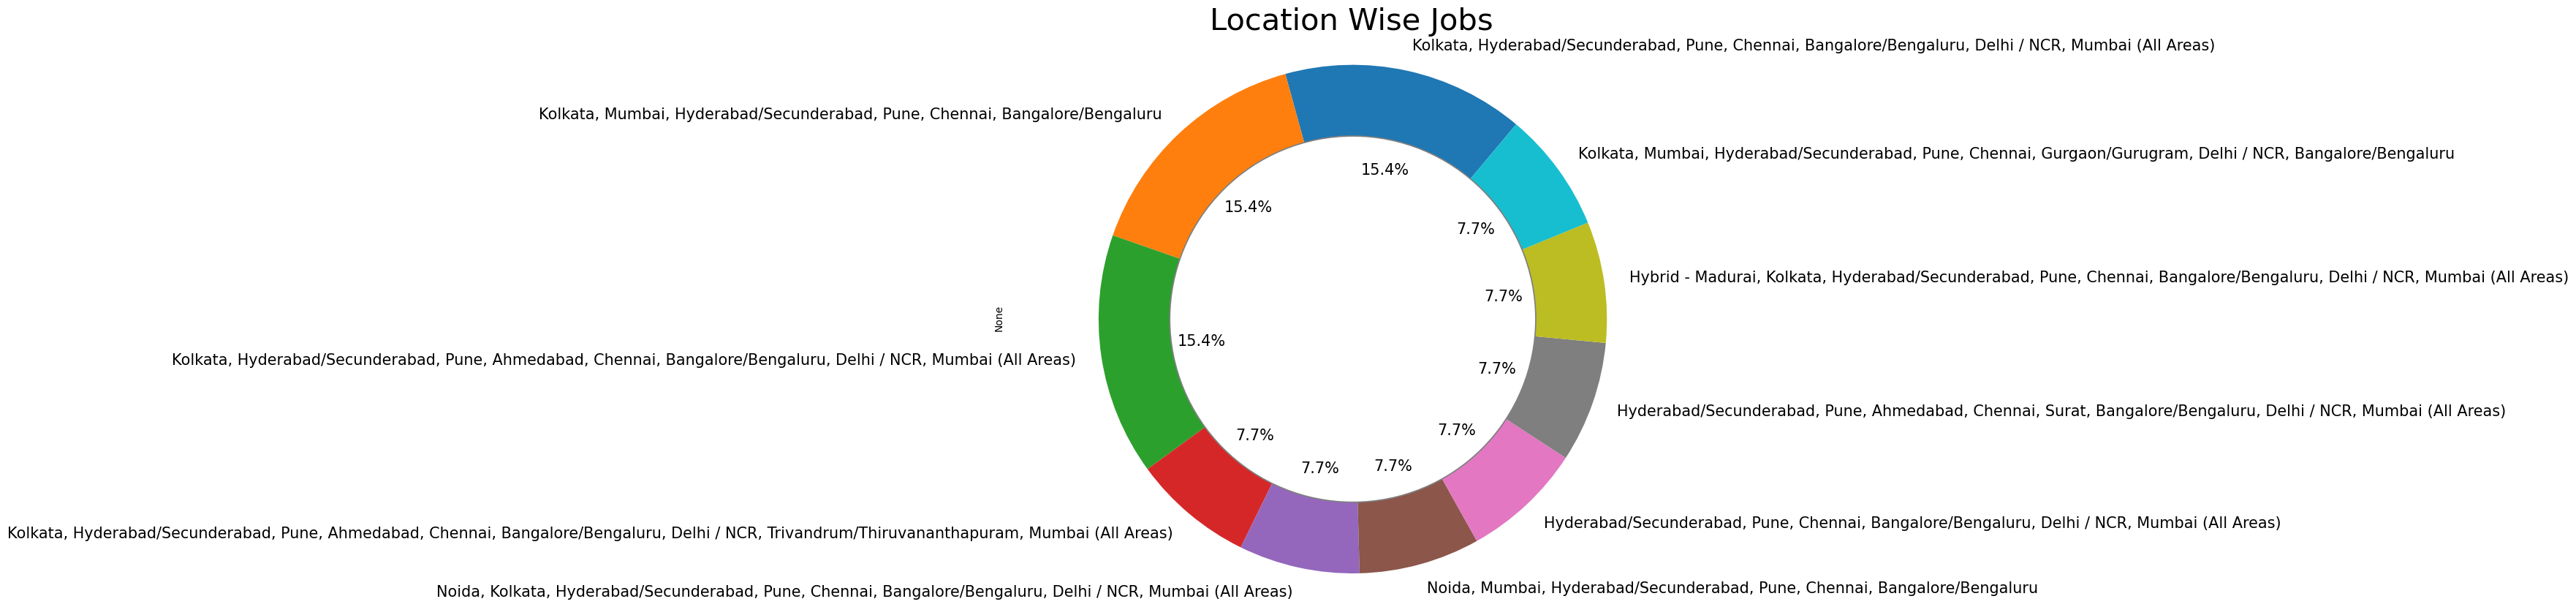

In [33]:
DS_jobs_df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(12,10),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Jobs",fontsize=30)

centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

### 3.2 Companies with Job Openings

In [ ]:
# DS_jobs_df["companies"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
# plt.title("Companies with Job Postings",fontsize=35)
# plt.show()

### Job Roles in demand

In [ ]:
# ### Roles
# DS_jobs_df["roles"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")#(figsize=(10,10),explode=[0.05,0.04,0.05,0,0,0,0,0,0,0],shadow=True, startangle=50,autopct='%1.1f%%')
# plt.xticks(rotation=45,ha='right')
# plt.title("Job Roles",fontsize=22)
# plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
# plt.xlabel("Roles",fontsize=15)
# plt.show()

### 3.4. Desired Experience for Jobs

In [ ]:
# DS_jobs_df["experience"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")
# plt.xlabel("No.of Vacancies",fontsize=18)
# plt.ylabel("Experience",fontsize=18)
# plt.show()

### 3.5. Skills required for The Job

In [ ]:
DS_jobs_df.skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(18,6),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
#plt.title("Top Skills for Data science",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills",fontsize=25)
plt.show()